# Simple model of pandemics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
%matplotlib inline

from covid import run_simulation

## Model
* We are going to assume that in a group of **population** people, each day everyone is going randomly to get in contact with one of the group members
* after the contact the chance to get infected is **p_sick_factor**
* a sick person with a chance of **p_dead_factor** will either die after **dead_days** days or will survive after **recovery_days** and become immune to the virus
* the simulation stops when no more sick people in the group are found

### Let's see how long pandemics takes for a small group of people (20)

In [16]:
population = 20
recovery_days = 14
dead_days = 5
p_sick_factor = 0.3
p_dead_factor = 0.1
summary_only = False
lines = run_simulation(population, recovery_days, dead_days, p_sick_factor, p_dead_factor, summary_only)

In [17]:
def plot_data(lines):
    df = pd.read_csv(StringIO("\n".join(lines)))
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.plot('Sick', data=df, color='red', linewidth=4)
    plt.plot('Immune', data=df, marker='', color='skyblue', linewidth=4)
    plt.plot('Dead', data=df, marker='', color='black', linewidth=4)
    plt.plot('Pop', data=df, marker='', color='olive', linewidth=4, linestyle='dashed', label="Population")
    plt.legend()
    return df

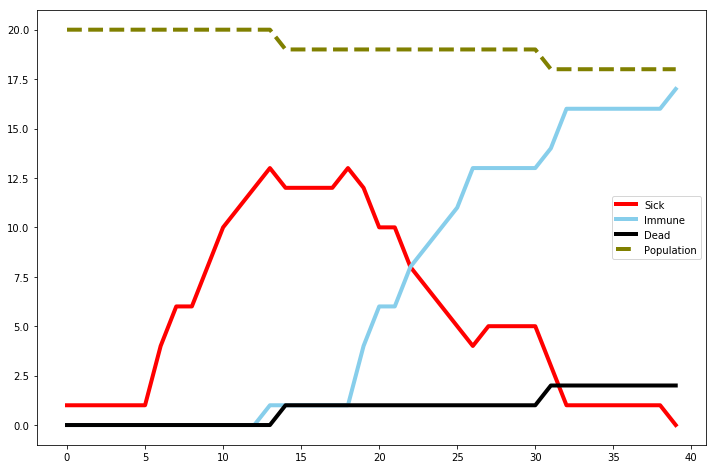

In [18]:
df = plot_data(lines)

### Notations for the person's status
* "0" a healthy person
* "+" infected person
* "-" recovered
* "x" dead

The column **people_details** shows the statuses of persons each day. **p_sick** the probability to get sick that day

In [19]:
df

,day,people_details,Pop,Sick,Dead,Healthy,Immune,p_sick
0,1,+0000000000000000000,20,1,0,19,0,0.0150
1,2,+0000000000000000000,20,1,0,19,0,0.0150
2,3,+0000000000000000000,20,1,0,19,0,0.0150
3,4,+0000000000000000000,20,1,0,19,0,0.0150
4,5,+0000000000000000000,20,1,0,19,0,0.0150
5,6,+0000000000000000000,20,1,0,19,0,0.0150
6,7,++00000000+000+00000,20,4,0,16,0,0.0600
7,8,+++000000++000+00000,20,6,0,14,0,0.0900
8,9,+++000000++000+00000,20,6,0,14,0,0.0900
9,10,+++000000+++0++00000,20,8,0,12,0,0.1200


### Let's run for a bit larger number of people, but with the same parameters

In [20]:
population = 100000
recovery_days = 14
dead_days = 5
p_sick_factor = 0.3
p_dead_factor = 0.1
summary_only = True # we are going to turn off people details since it's a large population
lines = run_simulation(population, recovery_days, dead_days, p_sick_factor, p_dead_factor, summary_only)

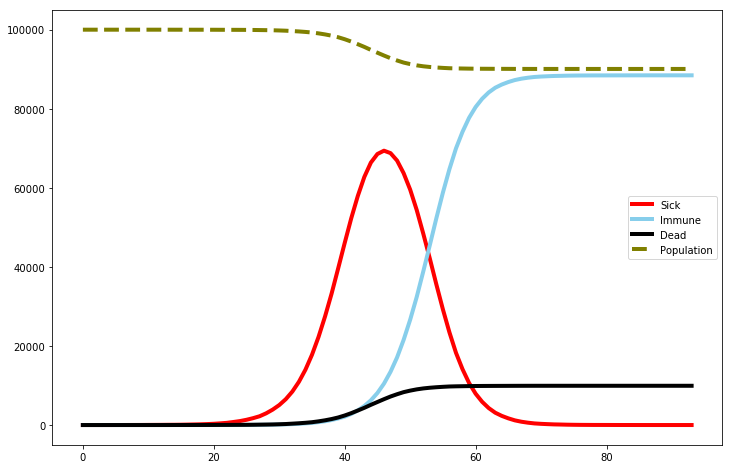

In [21]:
df = plot_data(lines)

In [22]:
df.tail()

,day,Pop,Sick,Dead,Healthy,Immune,p_sick
89,90,90071,1,9929,1614,88456,0.0
90,91,90071,1,9929,1614,88456,0.0
91,92,90071,1,9929,1614,88456,0.0
92,93,90071,1,9929,1614,88456,0.0
93,94,90071,0,9929,1614,88457,0.0
